In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
%matplotlib inline
SAMPLE_SIZE = 9 # number of discrete points within beam to compute

In [2]:
# point load at any point on beam

In [3]:
# Given:
#    span of beam, L
#    magnitude of load, P
#    distance from left end of beam to point of load, a
#    distance from left end of beam to point of interest, x
# Derive:
#    distance from right end of beam to point of load, b
#    reactions at ends of beams, R_1 and R_2
#    bending at point of interest

In [4]:
# M_max = Pab/L

In [5]:
# Enter case values sans units at present
P = 1 # kN
a = 1 # m
L = 4 # m
# Derive distance b
b = L - a
# Derive max moment
M_max = (P*a*b)/L
M_max

0.75

In [6]:
def moment_x(x, P, a, L):
    """
    Determine moment for simple beam w/ concentrated load at any position x.

    where
    x = distance from left end of beam to point of interest
    P = concentrated load
    a = distance from left end of beam to point of load
    L = length of span of beam

    The function does not take or allign units. Units of x, a and L must be identical. 

    Returns value of moment at x in units_of_P * units_of_x
    """
    b = L - a # derive b given a and L
    if x >= 0 and x <= a:
        M_x = (P*x*b)/L
    elif x > a and x <= L:
        M_x = (P*(L-x)*a)/L
    else:
        M_x = float('Nan')
        print("Error: x cannot be less than 0 or greater than L which is {} in this case".format(L))
    return M_x

In [7]:
position = np.linspace(0, L, SAMPLE_SIZE)
position

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

In [8]:
moment_x(position[int(SAMPLE_SIZE/2)], P, a, L)

0.5

In [9]:
moment_array = np.zeros(SAMPLE_SIZE)
for i in range(SAMPLE_SIZE):
    moment_array[i] = moment_x(position[i], P, a, L)
moment_array

array([0.   , 0.375, 0.75 , 0.625, 0.5  , 0.375, 0.25 , 0.125, 0.   ])

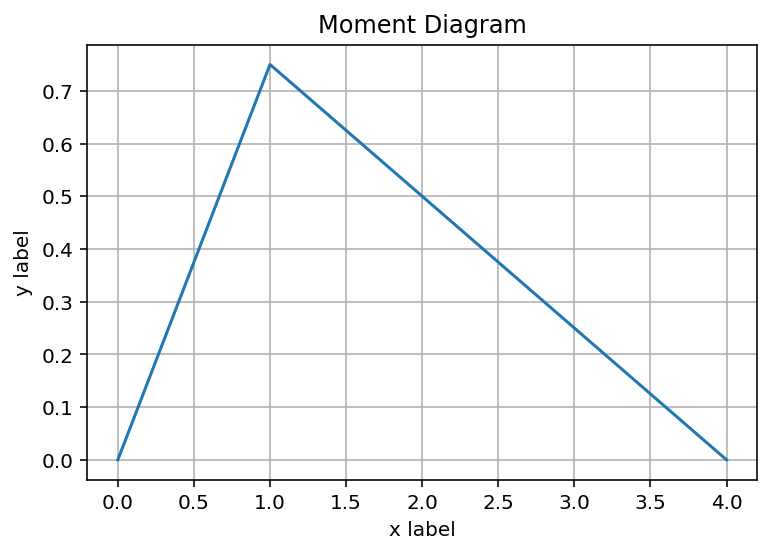

In [18]:
from matplotlib.widgets import Cursor
ax = plt.plot(position, moment_array)
plt.grid(b=True, which='both', axis='both')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Moment Diagram')
# plt.legend()
# cursor = Cursor(ax, useblit=True, color='red', linewidth=2)
plt.show()